<a href="https://colab.research.google.com/github/jchoi92k/CS8980/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Joon Suh Choi 002-51-1521

Question 1) (20 points) Write a generic function that takes: Classification algorithm name,
vectorization method name, training set with labels as parameters (total of 3 parameters should
be passed). The function should take the classification algorithm name, the vectorization
method’s name, and the training set and train the desired model. Use the default training
parameters for the models we have seen in class. This function should return the trained model

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns; sns.set()
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import random

# Takes classification algorithm name, vectorization method name, and training set with labels as parameters and trains model
def model_trainer(classalg, vecmeth, trainset):
  model = make_pipeline(vecmeth(), classalg())
  model.fit(trainset.data, trainset.target)
  return model

In [2]:
# Set seed
random.seed(12345)

# Create class to contain training/test sets
class set_w_labels:
  def __init__(self, data, target, target_names):
    self.data = data
    self.target = target
    self.target_names = target_names

# To create data set
texts = []
labels = []
text_titles = os.listdir(r'training/negative') + os.listdir(r'training/positive')
target_names = ['negative', 'positive']

# Open all files and append content/labels to respective lists
for w in os.listdir(r'training/negative'):
  with open(os.path.join(r'training/negative', w), 'r') as f:
    content = f.read()
  texts.append(content)
  labels.append(0)

for w in os.listdir(r'training/positive'):
  with open(os.path.join(r'training/positive', w), 'r') as f:
    content = f.read()
  texts.append(content)
  labels.append(1)

# Shuffle list
shuffler = list(zip(texts, labels, text_titles))
random.shuffle(shuffler)
texts, labels, text_titles = zip(*shuffler)

# Create data set
train = set_w_labels(texts, labels, target_names)

# Create and print test model
test_model = model_trainer(MultinomialNB, TfidfVectorizer, train)
print(test_model)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


Question 2) (30 points) Using the function from question 1 to build the following models:
a) Model a: Naive Bayes, Vectorizer: TFIDF and Bag of Words, Training set should be 75%
of the provided dataset. Leaving the remaining 25% for testing.
b) Model b: RandomForest, Vectorizer: TFIDF and Bag of Words, Training set should be
70% of the provided dataset. Leaving the remaining 30% for testing.
c) Model c: Support Vector Machines (SVC in sklearn), Vectorizer: TFIDF and Bag of
Words, Training set should be 60% of the provided dataset. Leaving the remaining 40%
for testing.
NOTE: Set the random seed to: 12345. This needs to be consistently set to train the model
AND split the data in test and train. If this is not done correctly, you will lose points as your
answers will not be comparable with the grading key.


In [ ]:
# Set seed
random.seed(12345)

#For model A (25000 * 0.75)
model_a_train = set_w_labels(train.data[:18750], train.target[:18750], target_names)
model_a_test = set_w_labels(train.data[18750:], train.target[18750:], target_names)

model_a_tfidf = model_trainer(MultinomialNB, TfidfVectorizer, model_a_train)
model_a_bow = model_trainer(MultinomialNB, CountVectorizer, model_a_train)

#Print models
print(model_a_tfidf)
print(model_a_bow)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Pipeline(memory=None,
  

In [ ]:
random.seed(12345)

#For model B (25000 * 0.7)
model_b_train = set_w_labels(train.data[:17500], train.target[:17500], target_names)
model_b_test = set_w_labels(train.data[17500:], train.target[17500:], target_names)

model_b_tfidf = model_trainer(RandomForestClassifier, TfidfVectorizer, model_b_train)
model_b_bow = model_trainer(RandomForestClassifier, CountVectorizer, model_b_train)

#Print models
print(model_b_tfidf)
print(model_b_bow)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
random.seed(12345)

#For model C (25000 * 0.6)
model_c_train = set_w_labels(train.data[:15000], train.target[:15000], target_names)
model_c_test = set_w_labels(train.data[15000:], train.target[15000:], target_names)

model_c_tfidf = model_trainer(SVC, TfidfVectorizer, model_c_train)
model_c_bow = model_trainer(SVC, CountVectorizer, model_c_train)

#Print models
print(model_c_tfidf)
print(model_c_bow)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape=

Question 3) (30 points) Using the models from Question 2, evaluate each model with its
respective training set (for model a, that set is 25% of the data, for model b, that set is 30% of
the data, and for model c that set is 40% of the data. Be careful to not mix up the evaluation
sets. With the predictions on the test set and show the following metrics: Accuracy, Precision,
Recall, and Macro F1-score. With this in mind, please write and answer these questions in your
notebook:
a) What model performs the best and why? (which metrics do you base this on, and why do
you think it performs better than others).
b) Why is it important not to mix up the testing sets between different models? Think about
this one.
c) Display in a single sorted dataframe (model name, training %, test %, accuracy,
precision, recall, F1-score) all performance metrics, sorted by accuracy in descending
manner.


Accuracy: 0.87216
Precision: 0.891562182311081
Recall: 0.8459807073954984
F1 Score: 0.8720429887385787


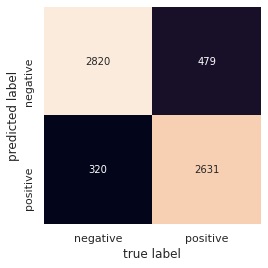

In [ ]:
#For "model a" tfidf

labels_a_tfidf = model_a_tfidf.predict(model_a_test.data)
mat_a_tfidf = confusion_matrix(model_a_test.target, labels_a_tfidf)

sns.heatmap(mat_a_tfidf.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(model_a_test.target,labels_a_tfidf))
print('Precision:', sklearn.metrics.precision_score(model_a_test.target,labels_a_tfidf))
print('Recall:', sklearn.metrics.recall_score(model_a_test.target,labels_a_tfidf))
print('F1 Score:', sklearn.metrics.f1_score(labels_a_tfidf, model_a_test.target, average='macro'))
# print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(model_a_test.target,labels_a_tfidf))
# print('Mean Squared Error:', sklearn.metrics.mean_squared_error(model_a_test.target, labels_a_tfidf))  
# print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(model_a_test.target, labels_a_tfidf)))

Accuracy: 0.8528
Precision: 0.8765474552957359
Recall: 0.8196141479099679
F1 Score: 0.8525968940858182


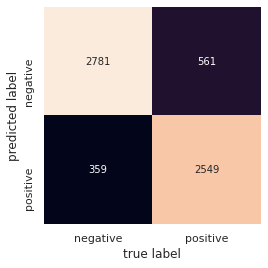

In [ ]:
#For "model a" bag of words

labels_a_bow = model_a_bow.predict(model_a_test.data)
mat_a_bow = confusion_matrix(model_a_test.target, labels_a_bow)

sns.heatmap(mat_a_bow.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(model_a_test.target,labels_a_bow))
print('Precision:', sklearn.metrics.precision_score(model_a_test.target,labels_a_bow))
print('Recall:', sklearn.metrics.recall_score(model_a_test.target,labels_a_bow))
print('F1 Score:', sklearn.metrics.f1_score(labels_a_bow, model_a_test.target, average='macro'))
# print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(model_a_test.target,labels_a_bow))
# print('Mean Squared Error:', sklearn.metrics.mean_squared_error(model_a_test.target, labels_a_bow))  
# print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(model_a_test.target, labels_a_bow)))

Accuracy: 0.8384
Precision: 0.8362713675213675
Recall: 0.8394101876675604
F1 Score: 0.8383980579037715


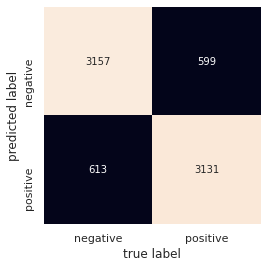

In [ ]:
#For "model b" tfidf

labels_b_tfidf = model_b_tfidf.predict(model_b_test.data)
mat_b_tfidf = confusion_matrix(model_b_test.target, labels_b_tfidf)

sns.heatmap(mat_b_tfidf.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(model_b_test.target,labels_b_tfidf))
print('Precision:', sklearn.metrics.precision_score(model_b_test.target,labels_b_tfidf))
print('Recall:', sklearn.metrics.recall_score(model_b_test.target,labels_b_tfidf))
print('F1 Score:', sklearn.metrics.f1_score(labels_b_tfidf, model_b_test.target, average='macro'))
# print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(model_b_test.target,labels_b_tfidf))
# print('Mean Squared Error:', sklearn.metrics.mean_squared_error(model_b_test.target, labels_b_tfidf))  
# print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(model_b_test.target, labels_b_tfidf)))

Accuracy: 0.8458666666666667
Precision: 0.8406564319745897
Recall: 0.8514745308310991
F1 Score: 0.8458664912969857


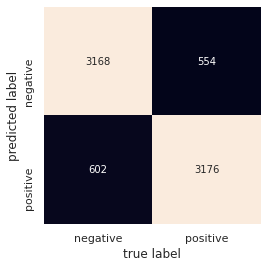

In [ ]:
#For "model b" bag of words

labels_b_bow = model_b_bow.predict(model_b_test.data)
mat_b_bow = confusion_matrix(model_b_test.target, labels_b_bow)

sns.heatmap(mat_b_bow.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(model_b_test.target,labels_b_bow))
print('Precision:', sklearn.metrics.precision_score(model_b_test.target,labels_b_bow))
print('Recall:', sklearn.metrics.recall_score(model_b_test.target,labels_b_bow))
print('F1 Score:', sklearn.metrics.f1_score(labels_b_bow, model_b_test.target, average='macro'))
# print('Mean Absolute Error:', sklearn.metrics.mean_bbsolute_error(model_b_test.target,labels_b_bow))
# print('Mean Squared Error:', sklearn.metrics.mean_squared_error(model_b_test.target, labels_b_bow))  
# print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(model_b_test.target, labels_b_bow)))

Accuracy: 0.8945
Precision: 0.8855409900215222
Recall: 0.9059247397918335
F1 Score: 0.8944879199219518


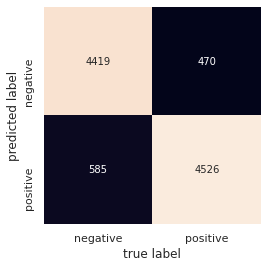

In [ ]:
#For "model c" tfidf

labels_c_tfidf = model_c_tfidf.predict(model_c_test.data)
mat_c_tfidf = confusion_matrix(model_c_test.target, labels_c_tfidf)

sns.heatmap(mat_c_tfidf.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(model_c_test.target,labels_c_tfidf))
print('Precision:', sklearn.metrics.precision_score(model_c_test.target,labels_c_tfidf))
print('Recall:', sklearn.metrics.recall_score(model_c_test.target,labels_c_tfidf))
print('F1 Score:', sklearn.metrics.f1_score(labels_c_tfidf, model_c_test.target, average='macro'))
# print('Mean Absolute Error:', sklearn.metrics.mean_cbsolute_error(model_c_test.target,labels_c_tfidf))
# print('Mean Squared Error:', sklearn.metrics.mean_squared_error(model_c_test.target, labels_c_tfidf))  
# print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(model_c_test.target, labels_c_tfidf)))

Accuracy: 0.8537
Precision: 0.8379567629615459
Recall: 0.8767013610888711
F1 Score: 0.8536272102753979


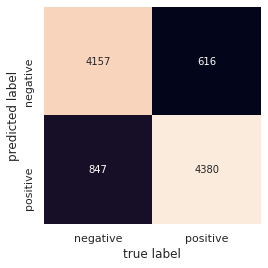

In [ ]:
#For "model c" bag of words

labels_c_bow = model_c_bow.predict(model_c_test.data)
mat_c_bow = confusion_matrix(model_c_test.target, labels_c_bow)

sns.heatmap(mat_c_bow.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(model_c_test.target,labels_c_bow))
print('Precision:', sklearn.metrics.precision_score(model_c_test.target,labels_c_bow))
print('Recall:', sklearn.metrics.recall_score(model_c_test.target,labels_c_bow))
print('F1 Score:', sklearn.metrics.f1_score(labels_c_bow, model_c_test.target, average='macro'))
# print('Mean Absolute Error:', sklearn.metrics.mean_cbsolute_error(model_c_test.target,labels_c_bow))
# print('Mean Squared Error:', sklearn.metrics.mean_squared_error(model_c_test.target, labels_c_bow))  
# print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(model_c_test.target, labels_c_bow)))

a) Model c with tfidf performed the best in terms of accuracy (0.8945), recall (0.9059) and macro F1-score (0.8944), and it was also the second best-performing in terms of precision (0.8855). It is somewhat expected that a model with TF-IDF vectorization would perform better than a model with bag of words vectorization because the former is a better proxy of which words are 'important' and meaningful in a document because it takes into account the inverse document frequency (i.e., range) of words.

b) It is important not to mix up the test sets because some part of the test set for one model could have been a part of the train set for another. For example, model c has a larger test set (40% of the data) than the other two models, and thus some part of its test set will inevitably be a part of another model's train set. This is important because the test set is meant to be separate from the training set (because training and evaluating using the same data will obviously boost the results) and the two should never be conflated. 

In [ ]:
# c)

random.seed(12345)

df = pd.DataFrame({'model name': ['a tfidf', 'a bag of words', 'b tfidf', 'b bag of words', 'c tfidf', 'c bag of words'], 'training %': [75, 75, 70, 70, 60, 60], 'test %': [25, 25, 30, 30, 40, 40]})

list_of_models = [[labels_a_tfidf, model_a_test], [labels_a_bow, model_a_test], [labels_b_tfidf, model_b_test], [labels_b_bow, model_b_test], [labels_c_tfidf, model_c_test], [labels_c_bow, model_c_test]]

accs = []
precs = []
recs = []
f1s = []

for pair in list_of_models:
  lbl = pair[0]
  mdl = pair[1]
  acc = sklearn.metrics.accuracy_score(mdl.target,lbl)
  prec = sklearn.metrics.precision_score(mdl.target,lbl)
  rec = sklearn.metrics.recall_score(mdl.target,lbl)
  f1 = sklearn.metrics.f1_score(lbl, mdl.target, average='macro')
  accs.append(acc)
  precs.append(prec)
  recs.append(rec)
  f1s.append(f1)

df['accuracy'] = accs
df['precision'] = precs
df['recall'] = recs
df['F1-score'] = f1s

df = df.sort_values(by='accuracy', ascending=False)
df

,model name,training %,test %,accuracy,precision,recall,F1-score
4,c tfidf,60,40,0.894500,0.885541,0.905925,0.894488
0,a tfidf,75,25,0.872160,0.891562,0.845981,0.872043
5,c bag of words,60,40,0.853700,0.837957,0.876701,0.853627
1,a bag of words,75,25,0.852800,0.876547,0.819614,0.852597
3,b bag of words,70,30,0.845867,0.840656,0.851475,0.845866
2,b tfidf,70,30,0.838400,0.836271,0.839410,0.838398


Question 4) (15 points) Using the documents in the folder named UNLABELED, please use
your best performing trained model from question 3 to predict their labels. Please do this
individually for each document. Print to the screen the following items: Document Name,
Predicted Label and using a text cell, write your own opinion if the label is correct and why -
note you have to read the document to make your own opinion.

In [ ]:
unlabeled_docs = []
unlabeled_docnames = os.listdir('unlabeled')

for t in unlabeled_docnames:
  with open(os.path.join('unlabeled', t), 'r') as f:
    content = f.read()
  unlabeled_docs.append(content)

In [ ]:
model_unlb = model_c_tfidf.predict(unlabeled_docs)

print(f'Document name: {unlabeled_docnames[0]}')
print(f'Predicted label: {target_names[model_unlb[0]]}')

Document name: 46278_0.txt
Predicted label: positive


This one is difficult to label because while the sentiment is positive, it is more of an anecdote about how the reviewer participated in the movie as an extra than it is a review. If I absolutely had to decide whether the label is correct, I would say yes because it accurately captures the sentiment of the text.

In [ ]:
print(f'Document name: {unlabeled_docnames[1]}')
print(f'Predicted label: {target_names[model_unlb[1]]}')

Document name: 36517_0.txt
Predicted label: negative


The predicted label seems to be correct. The sentiment is clearly negative as can be seen from the very first sentence: "Possibly the worst, most depressingly dreary and poorly lit movie ever made [...]"

In [ ]:
print(f'Document name: {unlabeled_docnames[2]}')
print(f'Predicted label: {target_names[model_unlb[2]]}')

Document name: 24221_0.txt
Predicted label: negative


The predicted label seems correct. The reviewer's sentiment can be summed up in the following two sentences: "This is just for real die hard fans of horror shorts... the slow ghost movies won't be too interesting for neither "Tales..." Fans nor others because they don't lead nowhere"

In [ ]:
print(f'Document name: {unlabeled_docnames[3]}')
print(f'Predicted label: {target_names[model_unlb[3]]}')

Document name: 46705_0.txt
Predicted label: negative


The label seems correct as can be seen from the following excerpt: "Final Verdict: 1/10. Truly, truly painful."

In [ ]:
print(f'Document name: {unlabeled_docnames[4]}')
print(f'Predicted label: {target_names[model_unlb[4]]}')

Document name: 37154_0.txt
Predicted label: negative


The label seems correct as can be seen from the final sentence of the review: "Overall, this is a pretty bad movie."

In [ ]:
print(f'Document name: {unlabeled_docnames[5]}')
print(f'Predicted label: {target_names[model_unlb[5]]}')

Document name: 0_0.txt
Predicted label: positive


The predicted label seems to be incorrect. While the document does have some positive tone, the general sentiment is negative as can be seen from the following excerpt: "I did like the lead actors, but thought little of the film"

In [ ]:
print(f'Document name: {unlabeled_docnames[6]}')
print(f'Predicted label: {target_names[model_unlb[6]]}')

Document name: 36022_0.txt
Predicted label: negative


This review is also difficult to label because it is extremely short (3 sentences) and all comments are about a certain actress (except for one where it says "some scenes are in early 3D"). If I had to decide, I would say this is correctly labeled negative, because the reviewer notes that the actress was better in other films.

In [ ]:
print(f'Document name: {unlabeled_docnames[7]}')
print(f'Predicted label: {target_names[model_unlb[7]]}')

Document name: 36149_0.txt
Predicted label: negative


The predicted label is correct. This is a one-sentence review that is very to-the-point: "The first one was bad enough, and the short skirts, one take filming, and Jack Palance in funny hats just made me nauseous."

In [ ]:
print(f'Document name: {unlabeled_docnames[8]}')
print(f'Predicted label: {target_names[model_unlb[8]]}')

Document name: 35991_0.txt
Predicted label: negative


The predicted lable is correct. The sentiment of the review is embodied in the following excerpt: "This film just regurgitates all the bad things about low budget disaster movies"

In [ ]:
print(f'Document name: {unlabeled_docnames[9]}')
print(f'Predicted label: {target_names[model_unlb[9]]}')

Document name: 49990_0.txt
Predicted label: negative


The predicted lable is correct as can be seen from the final sentence of the review: "My Grade: D+"

In [ ]:
print(f'Document name: {unlabeled_docnames[10]}')
print(f'Predicted label: {target_names[model_unlb[10]]}')

Document name: 35968_0.txt
Predicted label: negative


This one is also difficult to judge. The reviewer thinks highly of the director and thinks the title of the movie captures its quality: it's a "Fine Mess". While the reviewer states that he would give this movie three stars, again indicating that they are on the fence, I would say that this is correctly labeled negative because the majority of the review details the shortcomings of the film.

Question 5) (20 points) Build a function that takes the set of documents as input and returns a
cosine similarity matrix for those documents. Feed all documents in the TRAINING folder to this
matrix. Instead of printing the returned cosine similarity matrix, create a heatmap plot from the
returned matrix. Make sure your plot is nicely scaled, properly labeled, and uses a nice color
range to show the similarity.


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Takes documents as input and returns cosine similarity matrix
def tfidf_cosim(txt):
  vct = TfidfVectorizer()
  fitted = vct.fit_transform(txt)
  # Compute cosine similarity
  cosim = cosine_similarity(fitted, fitted)
  return cosim

# Create matrix to turn into heatmap
# A subset of all the documents (N=5,000) was used to accomodate for RAM when creating heatmap
cosim_mat = tfidf_cosim(texts[:5000])

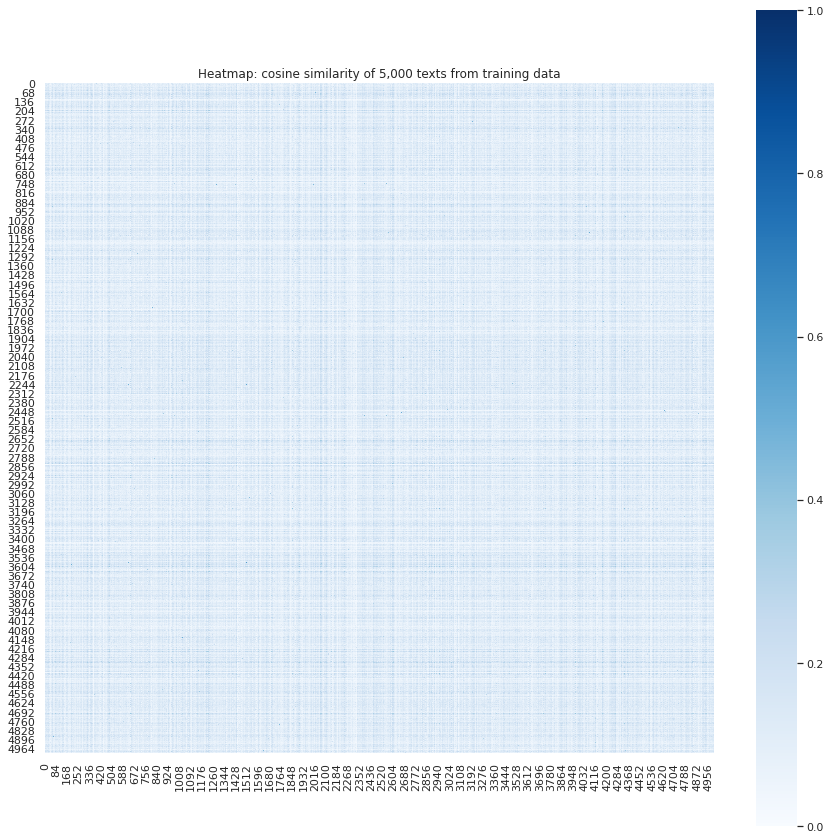

In [8]:
# Plot heatmap scaled to be more visible
plt.figure(figsize=(15, 15))
plt.title('Heatmap: cosine similarity of 5,000 texts from training data')
sns.heatmap(cosim_mat, square=True, xticklabels = 'auto', yticklabels = 'auto', cmap="Blues")

Question 6) (15 points) Write a function that takes a cosine similarity matrix as input and
returns a list with the top n document paris and their similarity. Note that you should only keep
the document pairs that are unique and remove the comparisons of the document to itself. Print
the top 50 similar document pairs. Compare the assigned class for each document and answer:
Do all similar documents belong to the same class? Why or why not?


In [7]:
# Create function that takes in cosine similarity matrix and returns top n document pairs + their similarity as a list
def topnsim(prevmat, n):
  # Create dataframe with matrix to sort the cosine similarities
  rows = []
  cols = []
  for row in range(len(prevmat)):
    rows += [row] * len(prevmat)
  for col in range(len(prevmat[0])):
    cols.append(col)
  cols = cols * len(prevmat[0])
  vals = prevmat.flatten()
  dfq = pd.DataFrame({'row_index':rows, 'col_index':cols, 'values':vals})
  # Remove all 1.0 cosine-similarities and sort (descending)
  dfq = dfq[dfq['values'] < 0.999999]
  dfq = dfq.sort_values(by=['values'], ascending=False)
  # Append results to this list
  res = []
  # Skip every other row because they are necessarily duplicates
  dfq = dfq.iloc[::2, :]

  doc1list = list(dfq['row_index'])
  doc2list = list(dfq['col_index'])
  vallist = list(dfq['values'])

  for i in range(n):
    res.append([doc1list[i], doc2list[i], vallist[i]])

  return res

# Get top 50 similar works from the subset used in the previous step. Print out the results.
similarities = topnsim(cosim_mat, 50)
for item in similarities:
  print(f'{text_titles[item[0]]}, a {target_names[labels[item[0]]]} text, is similar to {text_titles[item[1]]}, a {target_names[labels[item[1]]]} text, with a similarity of {item[2]}. Are the two from the same category?: {target_names[labels[item[0]]] == target_names[labels[item[1]]]}')

1929_4.txt, a negative text, is similar to 1930_4.txt, a negative text, with a similarity of 0.9840172342818269. Are the two from the same category?: True
6881_1.txt, a negative text, is similar to 6878_1.txt, a negative text, with a similarity of 0.7434267761116043. Are the two from the same category?: True
5403_10.txt, a positive text, is similar to 5406_7.txt, a positive text, with a similarity of 0.7125239052357476. Are the two from the same category?: True
9180_9.txt, a positive text, is similar to 9161_10.txt, a positive text, with a similarity of 0.6889811072835789. Are the two from the same category?: True
8670_8.txt, a positive text, is similar to 8671_7.txt, a positive text, with a similarity of 0.6650157421513446. Are the two from the same category?: True
10148_3.txt, a negative text, is similar to 7394_2.txt, a negative text, with a similarity of 0.6352133721952857. Are the two from the same category?: True
4076_10.txt, a positive text, is similar to 4074_10.txt, a positive

Not all similar documents belong to the same category as shown in the results above (although most belong to the same category). An examination of documents 4223_8 and 765_4 reveal that while one is positive and the other is negative, they are both reviews about a "Columbo" movie. And an examination of documents 1048_4 and 3502_9 reveals that both reviews mention the same actor (Victor Vargas). Based on such observations, it seems that reviews about same/similar movies or about the same actors (i.e., reviews that revolve around similar content words) can receive high cosine similarity scores regardless of their positivity/negativity.

Question 7) (20 points) Using Spacy’s part of speech tagger, process all sentences (hint: don’t
forget to split the reviews) and count how many NOUN and VERB tags are found in all the
movies review (TRAINING folder) separating them by label. In other words, how many NOUN
and VERB tags are found in positive reviews, and how many NOUN and VERB tags are found
in negative reviews. Answer the following question: When comparing both, do you see any
differences? Why do you think about the differences? Or lack of them.

In [15]:
from collections import defaultdict
import spacy

nlp = spacy.load("en_core_web_sm")

# List to hold all the tags for positive/negative reviews
posset = []
negset = []

# Iterate over texts and append tags to above list
for i in range(len(train.data)):
  t1 = train.data[i]
  if target_names[labels[i]] == 'positive':
    mode = 'positive'
  elif target_names[labels[i]] == 'negative':
    mode = 'negative'
  else:
    raise Exception('mode should be positive or negative')

  doc = nlp(t1)
  if mode == 'positive':
    # Split sentences
    for sent in doc.sents:
      for z in sent:
        posset.append(z.pos_)
  elif mode == 'negative':
    for sent in doc.sents:
      for z in sent:
        negset.append(z.pos_)

In [16]:
# Count tags in each list
poscount = [w for w in posset if w == 'NOUN' or w == 'VERB']
negcount = [w for w in negset if w == 'NOUN' or w == 'VERB']

print(f'There are {len(poscount)} NOUN/VERB tags in positive reviews, and {len(negcount)} in negative reviews.')
print(f'Normalized per token is {len(poscount) / len(posset)} and {len(negcount) / len(negset)} respectively.')

There are 885103 NOUN/VERB tags in positive reviews, and 884034 in negative reviews.
Normalized per token is 0.25749836718485214 and 0.26206015827943374 respectively.


Without any statistical analysis and just eyeballing the two numbers, it seems that there is not much of a difference between the two numbers. I think this is expected considering that there is no reason to assume that one type of review (i.e., positive/negative) would have more content words than the other.

Question 8) (20 points) Using the results from the PoS process in question 7, count how many
different PUNCT tags are found and their respective counts from the full dataset provided (both
negative and positives together). Using regex, write a set of regular expressions that generate
the same counts from the dataset without using NLTK or Spacy, just regex. Can you get the
same counts? If not, why do you think this is?


In [117]:
# Get the number of punctuations found by spacy
puncts = [w for w in posset if w == 'PUNCT'] + [w for w in negset if w == 'PUNCT']
print(f'There are {len(puncts)} punctuations in the texts according to spacy.')

There are 834967 punctuations in the texts according to spacy.


In [120]:
import re

holder = 0

for t in texts:
  # Use punctuation string from string.punctuation for a comprehensive list of punctuations
  # Experimented and removed certain elements that are treated as symbol by spacy
  base = re.findall(r"""[!"'()*,-./:;=?[\]`{}~]""", t)
  possessive = re.findall(r"\S's", t)
  negative = re.findall(r"\Sn't", t)
  adjacent_slash = re.findall(r"\S/", t)
  final = len(base) - len(possessive) - len(negative) - len(adjacent_slash)
  holder += final

# Final count
print(f'There are {holder} punctuations in the texts according to my regex script.')

There are 1015052 punctuations in the texts according to my regex script.


I was not able to get the same counts because spacy uses dependencies to decide whether the same punctuation should be labeled as PUNCT or something else. For example, hyphens between two adjectives are treated as an adjective (e.g., 'post-modern' is treated as a sequence of three adjectives) while hyphens connecting a noun is treated as a puncutation (e.g., the hyphen in 'spider-man' is treated as a punctuation).

Bonus Question: (40 points) Using the code from Class 09 - Word Embeddings, pre-tune
BERT in order to classify movie reviews. You can use the full TRAINING folder for the tuning
and use the UNLABELED folder for your final classification/prediction task. Do the label
predictions from BERT match what your classifier from Question 4 predicted? If they don’t, are
they better? Please say why. NOTE: This is a pro-level task and while you might be
tempted to copy code from the Internet, do not do it, as you will fail the class if you are
plagiarizing. The code from the class can be tweaked to do the task with some
adjustments. This is definitely not easy, but that is why it is worth an extra 40 points!

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

In [ ]:
!pip install transformers

________ because ___________